<a href="https://colab.research.google.com/github/scheung97/EECE5639_ComputerVision/blob/main/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# Northeastern University
# EECE5639 Computer Vision

# Spenser Cheung & Tim Liming

# Project 1

import cv2 
import numpy as np 
import os
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

from google.colab.patches import cv2_imshow
from google.colab import drive


In [ ]:
!python3 --version

Python 3.7.12


In [ ]:
# Mount Google Drive in Google Colab

# Public 'Office' folder link: 
# https://drive.google.com/drive/folders/1foo2U9aRLJ5osnCSF4ykIGJrTlZ7ubOk?usp=sharing

# Public 'RedChair' folder link: 
# https://drive.google.com/drive/folders/1gH_nkSJy04r9ankfNtUAYSOMpVML53bx?usp=sharing

drive.mount('/content/gdrive')

Office_path = "/content/gdrive/MyDrive/EECE5639_P1_Office"
RedChair_path = "/content/gdrive/MyDrive/EECE5639_P1_RedChair"

Mounted at /content/gdrive


In [ ]:
# i. Read in a sequence of image frames and make them grayscale.

# Office
office_files = [filename for filename in os.listdir(Office_path) if os.path.isfile(os.path.join(Office_path, filename))]

office_images = []    
for i in range(0, len(office_files)): 
    img = cv2.imread(os.path.join(Office_path, office_files[i]))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    office_images.append(gray_img)

office_images = np.array(office_images)
print(office_images.shape)


(460, 240, 320)


In [ ]:
# i. Read in a sequence of image frames and make them grayscale.

# RedChair
redchair_files = [filename for filename in sorted(os.listdir(RedChair_path)) if os.path.isfile(os.path.join(RedChair_path, filename))]

redchair_images = []
for i in range(0, len(redchair_files)): 
    img = cv2.imread(os.path.join(RedChair_path, redchair_files[i]))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    redchair_images.append(gray_img)

redchair_images = np.array(redchair_images)
print(redchair_images.shape)


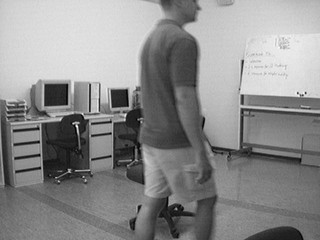

--------------------------------


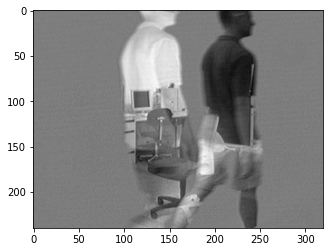

--------------------------------


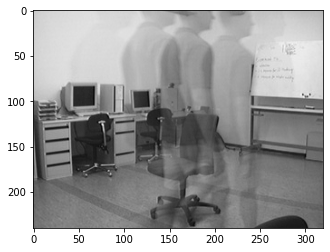

In [ ]:
# ii. As enough frames are available, apply a 1-D differential operator at each 
# pixel to compute a temporal derivative.

#images = office_images
images = redchair_images

# simple filter
temporal_filter = 0.5 * np.array([-1., 0., 1.])

frame = 162
cv2_imshow(images[frame,:,:])
print('--------------------------------')

frames1 = [images[frame-1,:,:], images[frame,:,:], images[frame+1,:,:]]
img1 = np.tensordot(frames1, temporal_filter, axes=(0,0)) # tensor product
plt.imshow(img1, cmap='gray')
plt.show()
print('--------------------------------')


# 1D derivative of a Gaussian
tsigma = 2.0

gaussian_filter = 1/16 * np.array([1, 4, 6, 4, 1])

frame = 162
frames2 = [images[frame-2,:,:], images[frame-1,:,:], \
           images[frame,:,:], \
           images[frame+1,:,:], images[frame+2,:,:]]
img2 = np.tensordot(frames2, gaussian_filter, axes=(0,0)) # tensor product

plt.imshow(img2, cmap='gray')
plt.show()


In [58]:
# main

def play_frames(frames):
    for f in frames:
        plt.imshow(f, cmap='gray')
        plt.show()
        #sleep(1)
        clear_output(wait=True)

# ii. As enough frames are available, apply a 1-D differential operator at each 
# pixel to compute a temporal derivative.

images = office_images
#images = redchair_images

# compute temporal derivative
operator_1d = np.array([-1, 0, 1])
vid1 = []
for i in range(1, len(images)-1):
    frames = [images[i-1,:,:], images[i,:,:], images[i+1,:,:]]
    img = np.tensordot(frames, operator_1d, axes=(0,0)) # tensor product
    vid1.append(img)
vid1 = np.array(vid1)

play_frames(vid1)


#-------------------------------------------------------------------------------
# iii. Threshold the absolute values of the derivatives to create a 0 and 1 
# mask of the moving objects.



KeyboardInterrupt: ignored